# The analysis of air quality

I want to analize the causality of weather on smog in Cracow. Meteorological and smog data comes from 2018 year. In the project I am doing exploratory data analysis, modeling linear regression in order to find important coefficients. In the last section I am implementing two machine learning models to find best predictions of the smog values based on weather.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Meteorological Dataset

Meteorological data comes from <a href='http://meteo.ftj.agh.edu.pl/'>AGH Serwis METEO</a>. It contains 36 features of the weather, daily measured.

In [2]:
meteo_full = pd.read_csv('meteo.txt', sep='\t')
meteo_full.drop('Unnamed: 37', axis=1, inplace = True)

meteo_columns = ['day', 'min wind_avg', 'min wind_max', 'min wind_min',
                 'avg wind_avg', 'avg wind_max', 'avg wind_min',
                 'max wind_avg', 'max wind_max', 'max wind_min',
                 'min wind dir_avg', 'min wind dir_max', 'min wind dir_min',
                 'avg wind dir_avg', 'avg wind dir_max', 'avg wind dir_min',
                 'max wind dir_avg', 'max wind dir_max', 'max wind dir_min',
                 'temp_avg', 'temp_max', 'temp_min',
                 'pres_avg', 'pres_max', 'pres_min',
                 'hum_avg', 'hum_max', 'hum_min',
                 'rain_avg', 'rain_max', 'rain_min',
                 'time rain_avg', 'time rain_max', 'time rain_min',
                 'int rain_avg', 'int rain_max', 'int rain_min']
meteo_full.columns = meteo_columns

meteo_full['day'] = meteo_full['day'].apply(lambda date: date.split()[0])
meteo_full.set_index('day', inplace = True)

In [3]:
meteo_full.head()

,min wind_avg,min wind_max,min wind_min,avg wind_avg,avg wind_max,avg wind_min,max wind_avg,max wind_max,max wind_min,min wind dir_avg,...,hum_min,rain_avg,rain_max,rain_min,time rain_avg,time rain_max,time rain_min,int rain_avg,int rain_max,int rain_min
day,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.42,2.5,0.0,1.02,3.9,0.1,1.58,5.9,0.3,219.26,...,60.5,0.02,0.35,0.0,83.43,1730.0,0.0,0.00,0.6,0.0
2018-01-02,0.41,2.7,0.0,1.24,5.1,0.1,2.04,7.9,0.2,225.48,...,65.5,0.01,0.03,0.0,93.61,400.0,0.0,0.00,0.4,0.0
2018-01-03,0.81,4.6,0.0,2.35,8.2,0.1,3.85,11.9,0.2,174.13,...,43.5,0.79,2.01,0.0,2729.39,7000.0,0.0,0.08,2.2,0.0
2018-01-04,0.98,5.1,0.0,2.57,8.2,0.3,4.02,11.5,0.8,179.04,...,53.1,0.53,2.02,0.0,4576.91,7070.0,0.0,0.02,0.9,0.0
2018-01-05,0.57,4.4,0.0,1.83,7.1,0.1,3.06,10.7,0.3,191.00,...,51.8,0.17,0.81,0.0,1150.39,5060.0,0.0,0.03,1.5,0.0


In [4]:
meteo_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 36 columns):
min wind_avg        365 non-null float64
min wind_max        365 non-null float64
min wind_min        365 non-null float64
avg wind_avg        365 non-null float64
avg wind_max        365 non-null float64
avg wind_min        365 non-null float64
max wind_avg        365 non-null float64
max wind_max        365 non-null float64
max wind_min        365 non-null float64
min wind dir_avg    365 non-null float64
min wind dir_max    365 non-null float64
min wind dir_min    365 non-null float64
avg wind dir_avg    365 non-null float64
avg wind dir_max    365 non-null float64
avg wind dir_min    365 non-null float64
max wind dir_avg    365 non-null float64
max wind dir_max    365 non-null float64
max wind dir_min    365 non-null float64
temp_avg            365 non-null float64
temp_max            365 non-null float64
temp_min            365 non-null float64
pres_avg            365

In [5]:
meteo_full.describe()

,min wind_avg,min wind_max,min wind_min,avg wind_avg,avg wind_max,avg wind_min,max wind_avg,max wind_max,max wind_min,min wind dir_avg,...,hum_min,rain_avg,rain_max,rain_min,time rain_avg,time rain_max,time rain_min,int rain_avg,int rain_max,int rain_min
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,0.569315,3.546027,0.005479,1.750904,5.746849,0.188493,2.949918,8.802192,0.466575,192.914000,...,44.595616,0.418493,1.893562,0.000575,836.377425,2973.397260,0.931507,0.046356,4.663836,0.0
std,0.211600,1.052400,0.023964,0.763254,1.940848,0.184210,1.359083,3.376453,0.386063,30.151969,...,14.998807,1.204677,4.721929,0.005971,1953.811997,5194.929371,6.220157,0.153938,13.733626,0.0
min,0.210000,1.200000,0.000000,0.640000,1.800000,0.000000,1.010000,2.400000,0.200000,102.570000,...,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.410000,2.800000,0.000000,1.200000,4.200000,0.100000,1.990000,6.100000,0.300000,172.170000,...,32.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.530000,3.500000,0.000000,1.580000,5.600000,0.100000,2.630000,8.600000,0.300000,197.080000,...,42.700000,0.010000,0.050000,0.000000,33.520000,360.000000,0.000000,0.000000,0.000000,0.0
75%,0.710000,4.200000,0.000000,2.220000,6.900000,0.200000,3.690000,10.800000,0.500000,211.650000,...,56.600000,0.220000,1.230000,0.000000,857.300000,3570.000000,0.000000,0.010000,1.800000,0.0
max,1.460000,7.500000,0.200000,4.800000,14.000000,1.600000,8.710000,24.300000,2.800000,277.350000,...,79.400000,11.550000,42.030000,0.100000,12896.090000,26600.000000,50.000000,1.830000,117.900000,0.0


# Meteo Simple

In [6]:
columns_to_drop = ['min wind_avg', 'min wind_max', 'min wind_min', 
                   'avg wind_min',
                   'max wind_avg', 'max wind_max', 'max wind_min',
                   'min wind dir_avg', 'min wind dir_max', 'min wind dir_min',
                   'avg wind dir_max', 'avg wind dir_min', 
                   'max wind dir_avg', 'max wind dir_max', 'max wind dir_min',
                   'temp_max', 'temp_min',
                   'pres_max', 'pres_min', 
                   'hum_max', 'hum_min',
                   'rain_min', 'rain_max',
                   'time rain_max', 'time rain_min',
                   'int rain_avg', 'int rain_max', 'int rain_min']
meteo = meteo_full.drop(columns_to_drop, axis = 1)

# Smog Dataset

In [7]:
sheet_names = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień',
               'Wrzesień', 'Październik', 'Listopad', 'Grudzień']
smog_columns = ['Day', 'NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5']
smog_columns_desc = ['Day', 'Nitrogen dioxide', 'Nitrogen oxides', 'Nitric oxide', 'Carbon monoxide',
                     'Carbon monoxide 8h2', 'Benzene', 'Dust suspended PM10', 'Dust suspended PM2.5']
smog_columns_unit = '[µg/m3]'

smog = pd.DataFrame(columns=smog_columns)
for sheet_name in sheet_names:
    smog_part = pd.read_excel('smog.xlsx', sheet_name=sheet_name)
    smog_part.columns = smog_columns
    smog_part.drop(labels = smog_part.index[0:3], axis=0, inplace = True)
    smog_part.drop(labels = smog_part.index[-3:], axis=0, inplace = True)
    smog = pd.concat([smog, smog_part], axis=0)

smog['Day'] = smog['Day'].apply(lambda dzien: '2018' + '-' + dzien.split('.')[1] + '-' + dzien.split('.')[0])    
smog.set_index(keys='Day', inplace = True)
smog.index = pd.to_datetime(smog.index)
smog.replace(to_replace = '-', value = np.nan, inplace = True)

for col in smog_columns[1:]:
    pd.to_numeric(smog[col])

Interpolating NA values

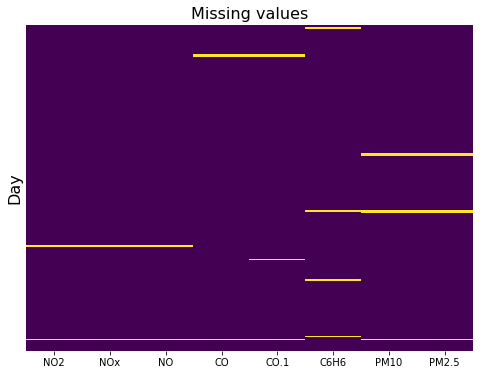

In [8]:
plt.figure(figsize = (8, 6))
sns.heatmap(smog.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.ylabel('Day', fontsize=16)
plt.title('Missing values', fontsize=16)
plt.show()

In [9]:
smog = smog.interpolate(method='time')

# Exploratory Data Analysis

In [10]:
data = pd.concat([smog, meteo_full], axis = 1)
data.head()

,NO2,NOx,NO,CO,CO.1,C6H6,PM10,PM2.5,min wind_avg,min wind_max,...,hum_min,rain_avg,rain_max,rain_min,time rain_avg,time rain_max,time rain_min,int rain_avg,int rain_max,int rain_min
2018-01-01,53.0,232.0,117.0,1221.0,1432.0,3.000000,62.0,56.0,0.42,2.5,...,60.5,0.02,0.35,0.0,83.43,1730.0,0.0,0.00,0.6,0.0
2018-01-02,49.0,236.0,122.0,1399.0,1975.0,5.000000,79.0,70.0,0.41,2.7,...,65.5,0.01,0.03,0.0,93.61,400.0,0.0,0.00,0.4,0.0
2018-01-03,60.0,235.0,115.0,764.0,1090.0,2.300000,32.0,22.0,0.81,4.6,...,43.5,0.79,2.01,0.0,2729.39,7000.0,0.0,0.08,2.2,0.0
2018-01-04,65.0,227.0,106.0,760.0,1059.0,3.366667,43.0,20.0,0.98,5.1,...,53.1,0.53,2.02,0.0,4576.91,7070.0,0.0,0.02,0.9,0.0
2018-01-05,72.0,281.0,136.0,1012.0,1408.0,4.433333,46.0,28.0,0.57,4.4,...,51.8,0.17,0.81,0.0,1150.39,5060.0,0.0,0.03,1.5,0.0


Text(0.5, 1.0, 'Chart of wind speed')

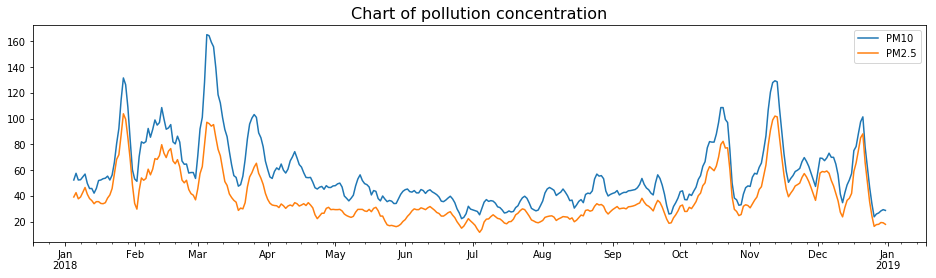

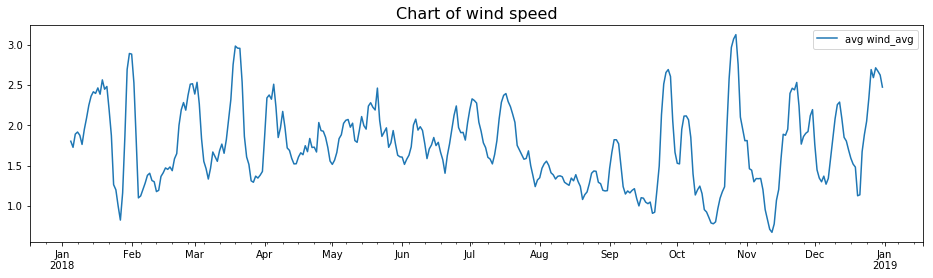

In [11]:
plt.figure(figsize = (16, 4))
PM = data[['PM10', 'PM2.5']].rolling(window = 5).mean()
PM['PM10'].plot.line()
PM['PM2.5'].plot.line()
plt.legend()
plt.title('Chart of pollution concentration', fontsize = 16)

wiatr = data['avg wind_avg'].rolling(window = 5).mean()
plt.figure(figsize = (16, 4))
wiatr.plot.line()
plt.legend()
plt.title('Chart of wind speed', fontsize = 16)

The charts above shows that decreases in smog value are preceded by high wind speed in the days before.

Text(0.5, 1.0, 'Correlation of individual parameters')

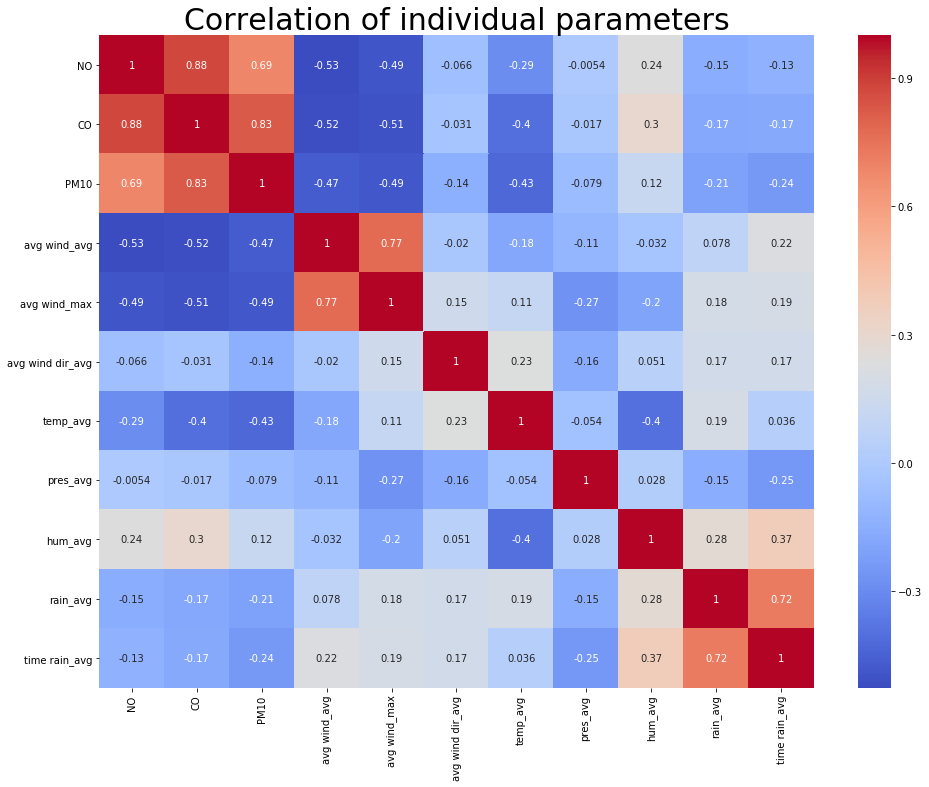

In [12]:
plt.figure(figsize = (16,12))
sns.heatmap(pd.concat([smog[['NO',  'CO', 'PM10']], meteo], axis = 1).corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlation of individual parameters', fontsize = 30)

The chart shows a strong correlation in various air pollutants. The lowest correlation on smog relates to wind speed and temperature. Positive correlation is related to air humidity.

C:\Users\Wiktor\Anaconda3\envs\tf_gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 6.799999999999997, 'Air humidity')

<Figure size 864x216 with 0 Axes>

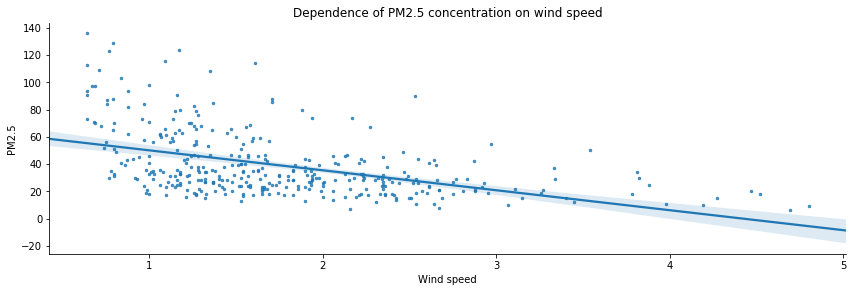

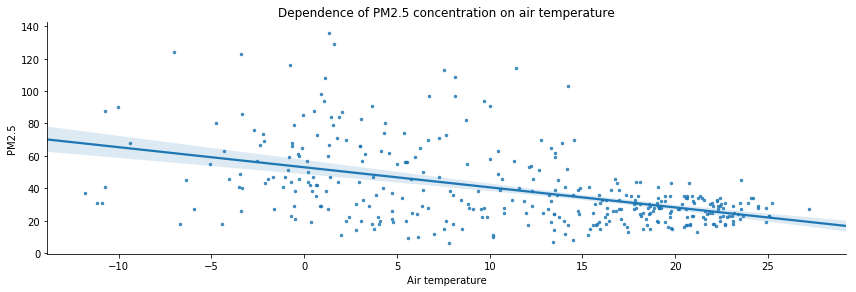

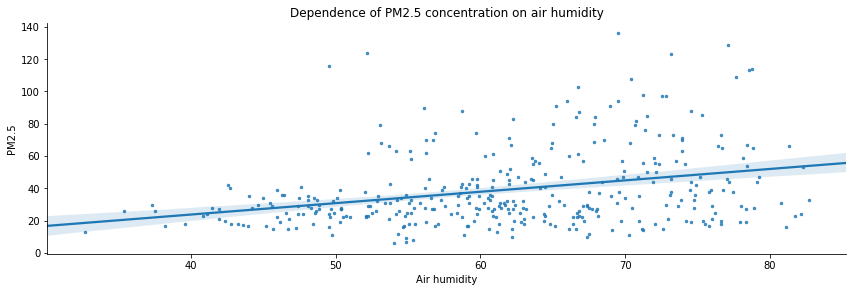

In [13]:
plt.figure(figsize=(12,3))
sns.lmplot(x = 'avg wind_avg', y = 'PM2.5', data = data, scatter_kws = {'s' : 6}, height = 4, aspect = 3)
ax = plt.gca()
ax.set_title("Dependence of PM2.5 concentration on wind speed")
ax.set_xlabel("Wind speed")

sns.lmplot(x = 'temp_avg', y = 'PM2.5', data = data, scatter_kws = {'s' : 6}, height = 4, aspect = 3) 
ax = plt.gca()
ax.set_title("Dependence of PM2.5 concentration on air temperature")
ax.set_xlabel("Air temperature")

sns.lmplot(x = 'hum_avg', y = 'PM2.5', data = data, scatter_kws = {'s' : 6}, height = 4, aspect = 3) 
ax = plt.gca()
ax.set_title("Dependence of PM2.5 concentration on air humidity")
ax.set_xlabel("Air humidity")

The charts above shows the dependance of three most relevant features on PM2.5 concentration. Scatter plots contains the linear model estimates.

# Linear Regression

In [14]:
X = data.drop(['NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5'], axis = 1)
Y = data['PM2.5']

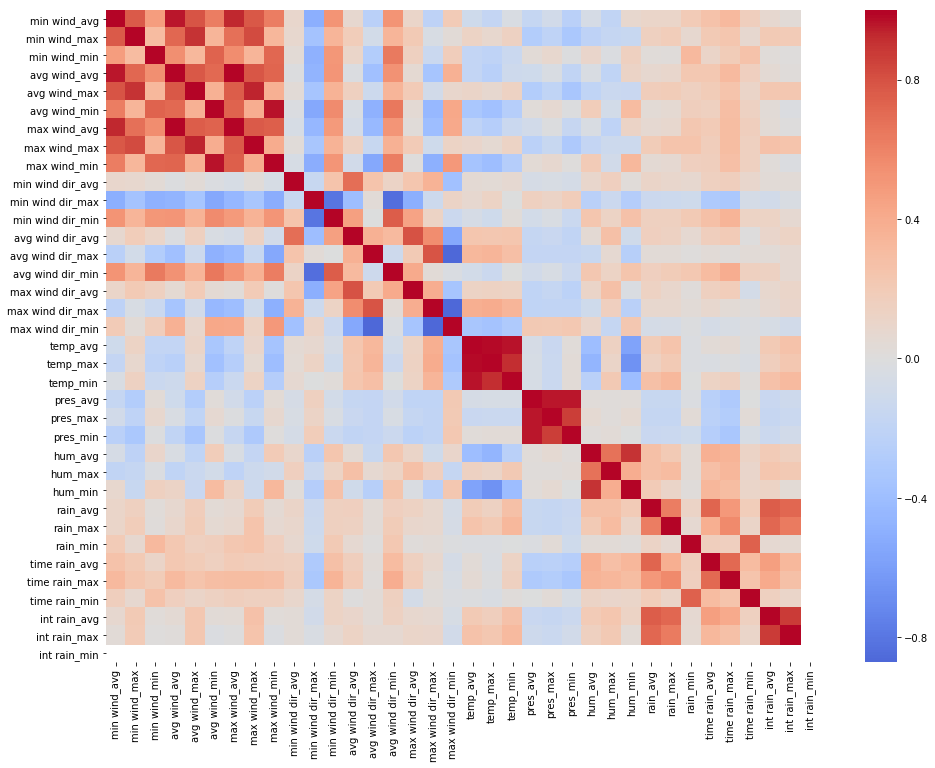

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(), cmap = 'coolwarm', center = 0)

Based on the heatmap, I reject some variables that have a high correlation. This should ensure the lack of multicollinearity.

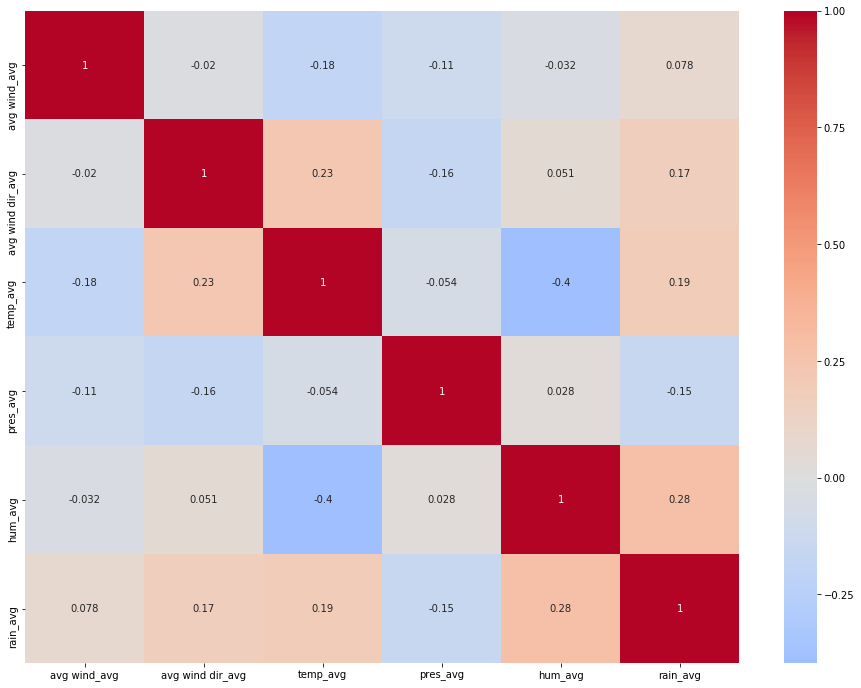

In [16]:
columns_to_drop = ['min wind_avg', 'min wind_max', 'min wind_min', 
                   'avg wind_min', 'avg wind_max',
                   'max wind_avg', 'max wind_max', 'max wind_min',
                   'min wind dir_avg', 'min wind dir_max', 'min wind dir_min',
                   'avg wind dir_max', 'avg wind dir_min', 
                   'max wind dir_avg', 'max wind dir_max', 'max wind dir_min',
                   'temp_max', 'temp_min',
                   'pres_max', 'pres_min', 
                   'hum_max', 'hum_min',
                   'rain_min', 'rain_max',
                   'time rain_avg', 'time rain_max', 'time rain_min',
                   'int rain_avg', 'int rain_max', 'int rain_min']
                    

X_simple = X.drop(columns_to_drop, axis = 1)
plt.figure(figsize=(16,12))
sns.heatmap(X_simple.corr(), cmap = 'coolwarm', annot = True, center = 0)

In [17]:
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_simple, Y, test_size=0.15, random_state=42)

est = sm.OLS(Y_train, X_train, hasconst = False)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     382.6
Date:                Thu, 04 Apr 2019   Prob (F-statistic):          1.97e-138
Time:                        13:52:22   Log-Likelihood:                -1286.6
No. Observations:                 310   AIC:                             2585.
Df Residuals:                     304   BIC:                             2608.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
avg wind_avg       -17.3126      1.238  

The learning shows that there is a strong evidence that the wind direction and rainfall are insignificant (p > 0.05). For this reason I am dropping these variables. After dropping this values I found that pressure is also irrelevant.

In [18]:
X_simple2 = X_simple.drop(['avg wind dir_avg', 'rain_avg', 'pres_avg'], axis = 1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_simple2, Y, test_size=0.15, random_state=42)

est = sm.OLS(Y_train2, sm.add_constant(X_train2))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     129.4
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           4.00e-54
Time:                        13:52:22   Log-Likelihood:                -1287.2
No. Observations:                 310   AIC:                             2582.
Df Residuals:                     306   BIC:                             2597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           76.4904      6.971     10.972   

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = est2.predict(sm.add_constant(X_test2))
print('Mean squared error: ' + str(mean_squared_error(Y_test2, predictions)))
print('Mean absolute error: ' + str(mean_absolute_error(Y_test2, predictions)))

Mean squared error: 303.1123447604024
Mean absolute error: 12.987775533918704


Coefficients now have good p values. The model reproduces true causality. 

- Increase in speed wind by 1 m/s causes 17.78 µg/m3 reduce concentration of PM2.5.
- 1°C drop of temperature causes 1.47 µg/m3 raise concentration of PM2.5.
- One g/m3 raise in humidity causes 0.16 µg/m3 raise concentration of PM2.5.

All causality has been proven through research, so I think my regression is well modeled.

# Machine Learning prediction

Below I am implementing 2 Machine Learning models.
- The first one predict smog values based just on the weather on that day
- The second one predict smog value based on the weather from a few days before

# MLP Model

In [20]:
import keras
from keras.layers import Dense, Dropout, Input 
from keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Using TensorFlow backend.


In [21]:
X = data.drop(['NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5'], axis = 1)
Y = data[['NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
scalerY = MinMaxScaler(copy=True, feature_range=(-1, 1))
Y_train_scaled = scalerY.fit_transform(Y_train)
X_test_scaled = scalerX.transform(X_test)
Y_test_scaled = scalerY.transform(Y_test)

Validation loss:  0.12178135408114081


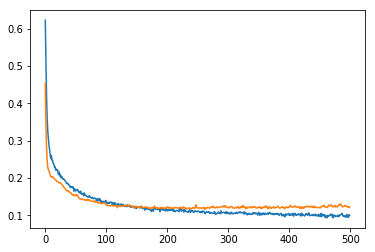

In [22]:
n = len(X.columns)
Y_n = len(Y.columns)

def mlp_model():
    inputs = Input(shape = (n,))
    X = Dense(units = 100, activation = 'relu')(inputs)
    X = Dropout(rate = 0.5)(X)
    pred = Dense(units = Y_n, activation = 'tanh')(X)

    model = Model(inputs = inputs, outputs = pred)
    return model

model = mlp_model()
model.compile(optimizer = 'adam',
              loss='mean_absolute_error')

history = model.fit(X_train_scaled, Y_train_scaled, validation_data = (X_test_scaled, Y_test_scaled),
                    epochs = 500, batch_size = 32, verbose = 0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
print('Validation loss: ', history.history['val_loss'][-1])

In [23]:
pred = model.predict(X_test_scaled)
pred = scalerY.inverse_transform(pred)
percentage_error = 0

for i in range(Y_n):
    avg_error = np.average(np.abs(pred[:, i] - Y_test.values[:, i]))
    range_of_value = Y_test.values[:, i].max() - Y_test.values[:, i].min()
    percentage_error += avg_error / range_of_value
    print('Mean absolute error in {}: {:0.1f}, range of value: {}'.format(Y.columns[i], avg_error, range_of_value))
    
percentage_error /= Y_n
print('Mean percentage error relative to range of values: ', 100*percentage_error) 

Mean absolute error in NO2: 7.2, range of value: 60.0
Mean absolute error in NOx: 33.2, range of value: 381.0
Mean absolute error in NO: 18.6, range of value: 221.0
Mean absolute error in CO: 117.5, range of value: 1444.0
Mean absolute error in CO.1: 194.0, range of value: 1906.0
Mean absolute error in C6H6: 1.2, range of value: 13.0
Mean absolute error in PM10: 12.4, range of value: 172.0
Mean absolute error in PM2.5: 8.7, range of value: 113.0
Mean percentage error relative to range of values:  8.941438296278179


I think that predicted values are pretty good. Error rarely exceeds 10% of value range. Mean percentage error is 8.94%. I hope that the LSTM model will be ever better.

# LSTM Model

I am choosing sequence of 10 days to predict current smog value. It is no problem to get weather data from 10 days before and it gives better predictions than lower Tx values. Higher Tx values would result in longer training and may cause overfitting.

In [24]:
X = data.drop(['NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5'], axis = 1)
Y = data[['NO2', 'NOx', 'NO', 'CO', 'CO.1', 'C6H6', 'PM10', 'PM2.5']]

Tx = 10
n = len(X.columns)
m = len(X)
Y_n = len(Y.columns)

X_seq = np.zeros((m - Tx, Tx, n))
Y_seq = np.zeros((m - Tx, Y_n))

for i in range(0, m - Tx):
    X_seq[i] = np.asarray(X.iloc[i:i+Tx])
    Y_seq[i] = np.asarray(Y.iloc[i+Tx-1])

In [25]:
import keras
from keras.layers import Dense, Dropout, Input, LSTM
from keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=14)

def scale_X_seq(X_train, X_test):
    for i in range(n):
        avg = np.average(X_train[:, :, i])
        std = np.std(X_train[:, :, i])
        if (std != 0):
            X_train[:, :, i] = (X_train[:, :, i] - avg) / std
            X_test[:, :, i] = (X_test[:, :, i] - avg) / std
    return X_train, X_test

X_train_scaled, X_test_scaled = scale_X_seq(X_train, X_test)

scalerY = MinMaxScaler(copy=True, feature_range=(-1, 1))
Y_train_scaled = scalerY.fit_transform(Y_train)
Y_test_scaled = scalerY.transform(Y_test)    

Validation loss:  0.09389123593417692


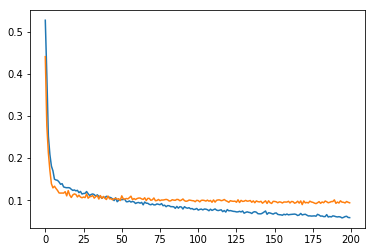

In [27]:
def lstm_model():
    inputs = Input(shape = (Tx, n))
    X = LSTM(128, dropout=0.5)(inputs)
    pred = Dense(units = 8, activation = 'tanh')(X)

    model = Model(inputs = inputs, outputs = pred)
    return model

model = lstm_model()
model.compile(optimizer = 'adam',
              loss='mean_absolute_error')
history = model.fit(X_train_scaled, Y_train_scaled, validation_data = (X_test_scaled, Y_test_scaled),
                    epochs = 200, batch_size = 32, verbose = 0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
print('Validation loss: ', history.history['val_loss'][-1])

In [28]:
pred = model.predict(X_test_scaled)
pred = scalerY.inverse_transform(pred)
percentage_error = 0

for i in range(Y_n):
    avg_error = np.average(np.abs(pred[:, i] - Y_test[:, i]))
    range_of_value = Y_test[:, i].max() - Y_test[:, i].min()
    percentage_error += avg_error / range_of_value
    print('Mean absolute error in {}: {:0.1f}, range of value: {}'.format(Y.columns[i], avg_error, range_of_value))
    
percentage_error /= Y_n
print('Mean percentage error relative to range of values: ', 100*percentage_error)

Mean absolute error in NO2: 6.5, range of value: 81.0
Mean absolute error in NOx: 30.2, range of value: 399.0
Mean absolute error in NO: 16.8, range of value: 222.0
Mean absolute error in CO: 81.2, range of value: 1523.0
Mean absolute error in CO.1: 136.1, range of value: 1906.0
Mean absolute error in C6H6: 0.6, range of value: 13.4
Mean absolute error in PM10: 9.5, range of value: 102.0
Mean absolute error in PM2.5: 6.2, range of value: 83.0
Mean percentage error relative to range of values:  7.0829293345352236


The LSTM model as expected works even better than simple MLP. Mean percentage error is now 7.08%. Mean absoulte error of PM2.5 is 6.2 more than two times lower than 12.98 obtained on linear regression.<br>
It is a good estimation of smog values based on just the weather. If I would like to further improve model performance I would try to get more data and try to implement different architectures.